# Subplots

In [10]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

<IPython.core.display.Javascript object>


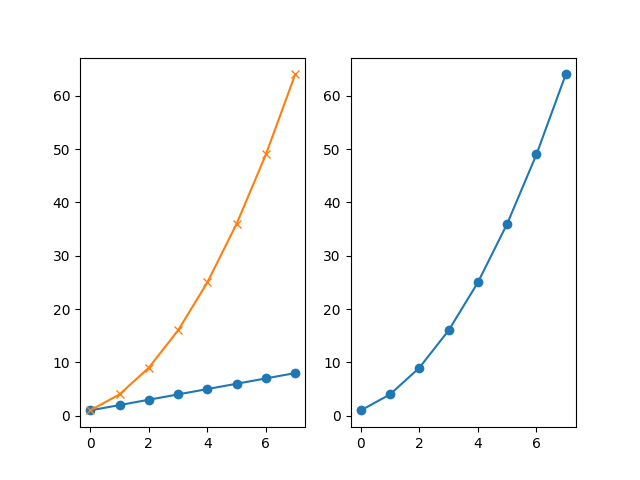

In [11]:
# In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command 
# allows for creating axis to different portions of this grid.
plt.figure()

# Subplot with 1 row, 2 columns, and current axis is 1st subplot axes
# Grid is numbered from left to right, top to bottom, so this will create a subplot towards left of the plot
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [12]:
exponential_data = linear_data**2 

# Subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
# Notice how the two subplots seem to show similar trends/shape. Is that really the case?
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

In [13]:
# Plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


<IPython.core.display.Javascript object>


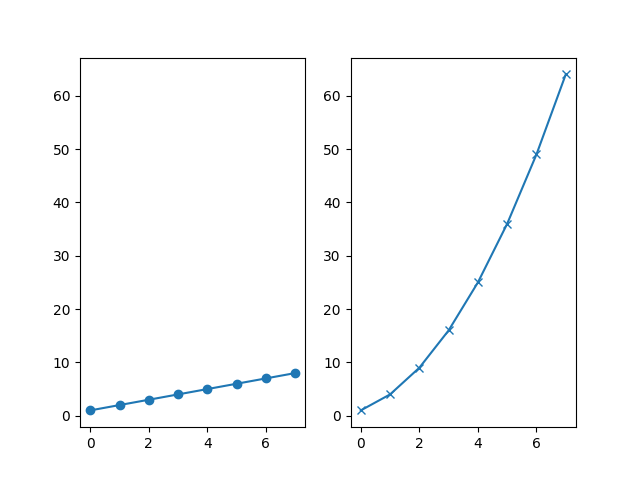

In [14]:
plt.figure()
# Keey in mind that plot location in the matrix of items is indexed starting at one, **not** zero.
# This is different from the convention used by NumPy (and most other languages/libraries)
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# Pass sharey=ax1 to ensure the two subplots share the same y axis
# Locking axes prevents misleading visuals (size, trend etc.) due to y-axis scale difference.
# As with the example plot shown above he two subplots are of very different values, yet look
# very similar in trends due to the right subplot being scaled differently from the left one.
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


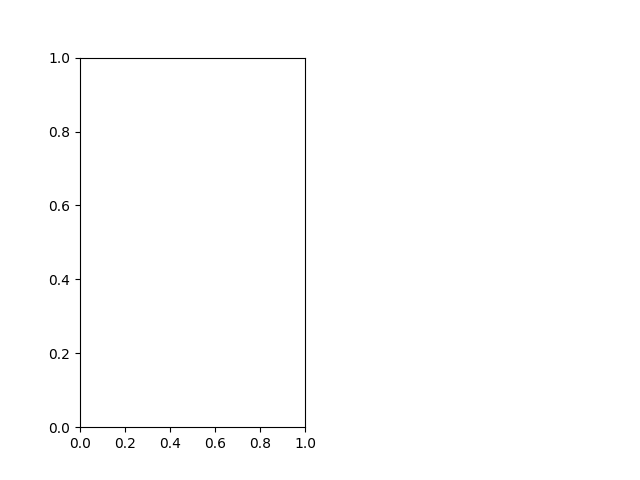

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


True

In [15]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


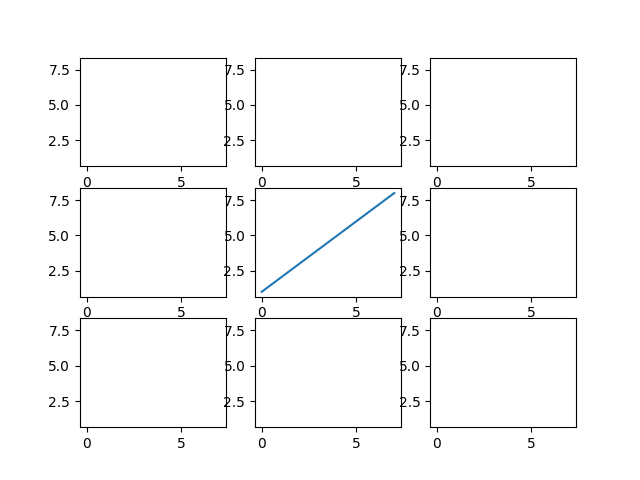

In [23]:
# Create a 3x3 grid of subplots
# subplots(), note the plural, allows for obtaining multiple axis objects at once 
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [30]:
# subplots() turns off x and y labels except for those plots on the left side, or bottom of figure.
# Need to explicitly turn axis labels back on
# Set inside tick labels to visible
for ax in plt.gcf().get_axes():
    # for label in ax.get_xticklabels()+ax.get_yticklabels():
    #    label.set_visible(True)
    # Have to do the following in newer version of matplotlib, and no redraw necessary
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.yaxis.set_tick_params(labelleft=True)

In [31]:
# necessary on some systems to update the plot
# plt.gcf().canvas.draw()

# Histograms

A **histogram** is a bar chart which shows the frequency of a given phenomena.
A great example are probability distributions. Probability function can be visualized as a curve, where the y-axis represents probability a given value would occur given a distribution, and the x-axis is the value itself. This is called a **probability density function (PDF)**. The y-axis values are limited to between zero and one.
The x-axis values are labeled in terms of the distribution function.

So a histogram is just a bar chart where the x-axis is a given observation and the y-axis is the frequency with which that observation occurs. So we should be able to plot a given probability distribution by sampling from it.

<IPython.core.display.Javascript object>


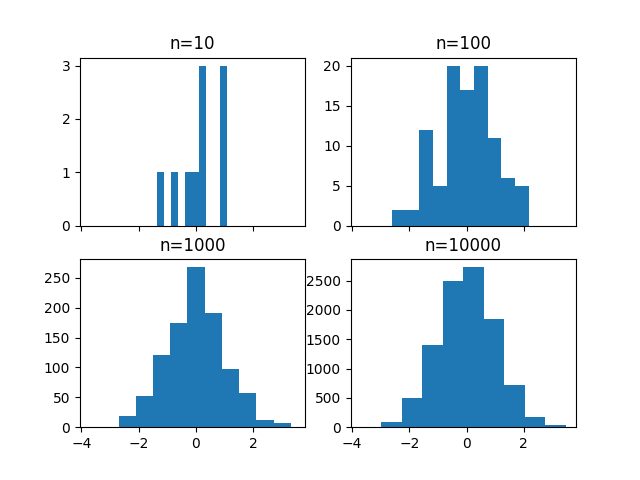

In [32]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    # By default, histograms in matplotlib are created with 10 bins
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


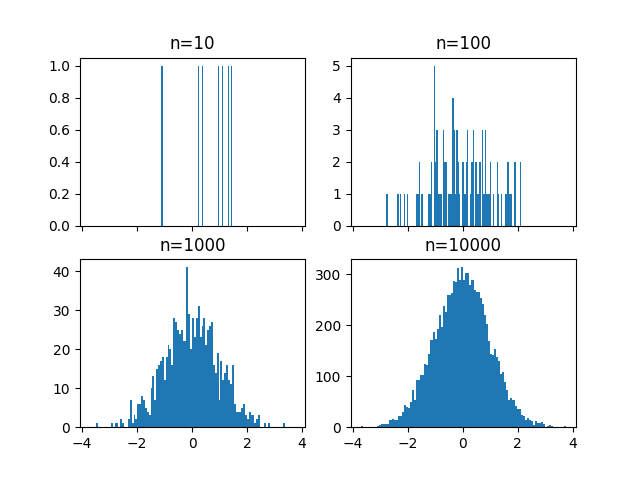

In [33]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


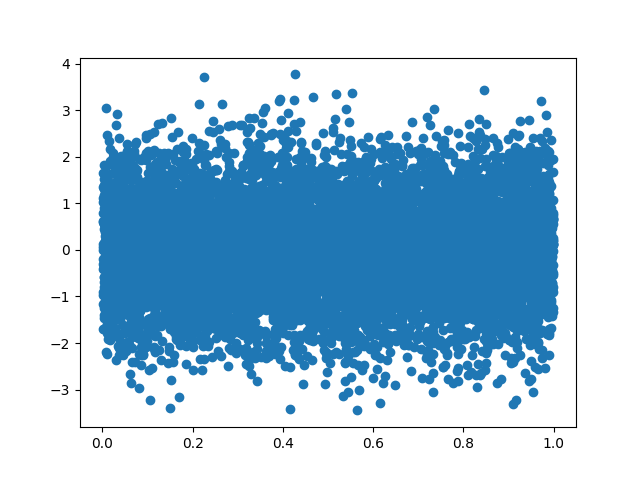

In [34]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)

<IPython.core.display.Javascript object>


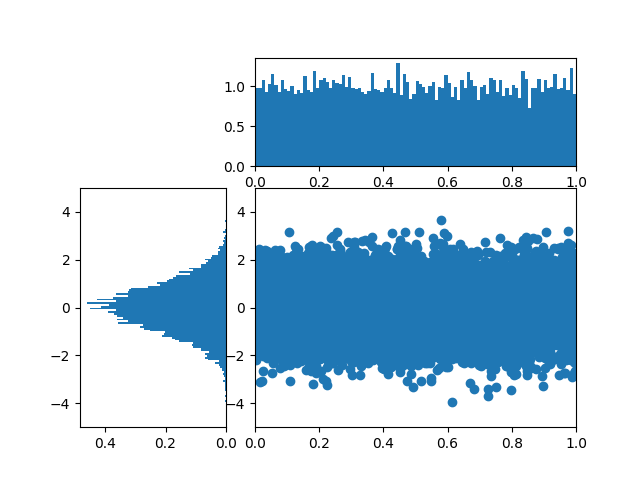

In [35]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)

# When adding items to GridSpec-ed subplots, instead of specifying number rows, columns, and the positions, specify
# elements of the GridSpec object each subplot should cover.
# Note since here we are referencing elements of a list, *all indices start at zero*, and it's possible to use
# list slicing to specify sublists.
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [36]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')

In [39]:
# clear the histograms and plot normed histograms
top_histogram.clear()
# normed kwarg is deprecated and replaced by density
top_histogram.hist(X, bins=100, density=True)
#top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()

# side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
side_histogram.hist(Y, bins=100, orientation='horizontal', density=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [40]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

A box plot. Sometimes called a box-and-whisker plot is a method of showing aggregate statistics of various 
samples in a concise matter. The box plot simultaneously shows, for each sample, the median of each value, 
the minimum and maximum of the samples, and the interquartile range.


In [42]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})

In [43]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.007400,0.496548,2.001625
std,0.999861,0.287327,1.446096
min,-3.450161,0.000524,0.016692
25%,-0.663347,0.250049,0.940337
50%,0.004726,0.494803,1.663647
75%,0.686146,0.744702,2.702240
max,4.199199,0.999833,11.556576


<IPython.core.display.Javascript object>


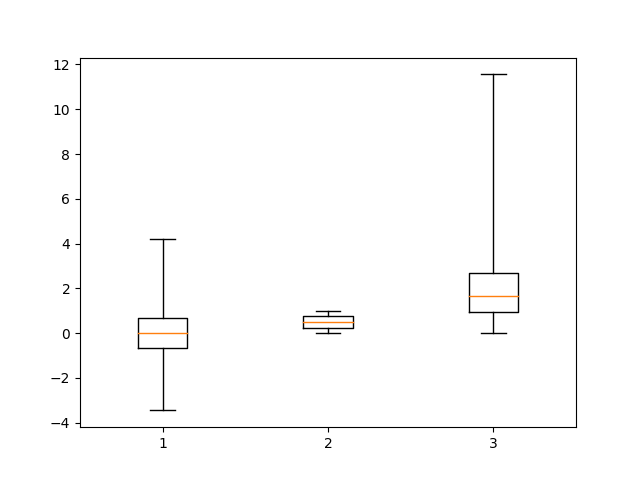

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  This is separate from the ipykernel package so we can avoid doing imports until


{'whiskers': [<matplotlib.lines.Line2D at 0x1184580d0>,
 'caps': [<matplotlib.lines.Line2D at 0x118458b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x118454a50>],
 'medians': [<matplotlib.lines.Line2D at 0x118461650>],
 'fliers': [<matplotlib.lines.Line2D at 0x118461b90>],
 'means': []}

In [47]:
plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis='range')

# Without output suppression, matplotlib by default outputs all components on the figure, along with the boxplot
# {'whiskers': [<matplotlib.lines.Line2D at 0x1184580d0>,
#   <matplotlib.lines.Line2D at 0x118458610>],
#  'caps': [<matplotlib.lines.Line2D at 0x118458b50>,
#   <matplotlib.lines.Line2D at 0x1184610d0>],
#  'boxes': [<matplotlib.lines.Line2D at 0x118454a50>],
#  'medians': [<matplotlib.lines.Line2D at 0x118461650>],
#  'fliers': [<matplotlib.lines.Line2D at 0x118461b90>],
#  'means': []}

In [48]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  after removing the cwd from sys.path.


<IPython.core.display.Javascript object>


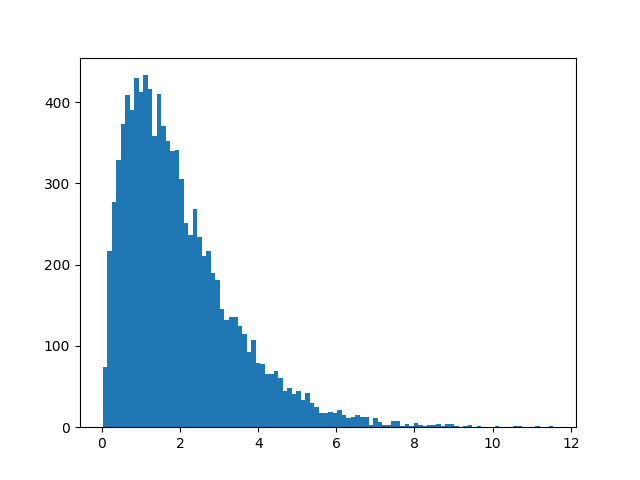

In [46]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


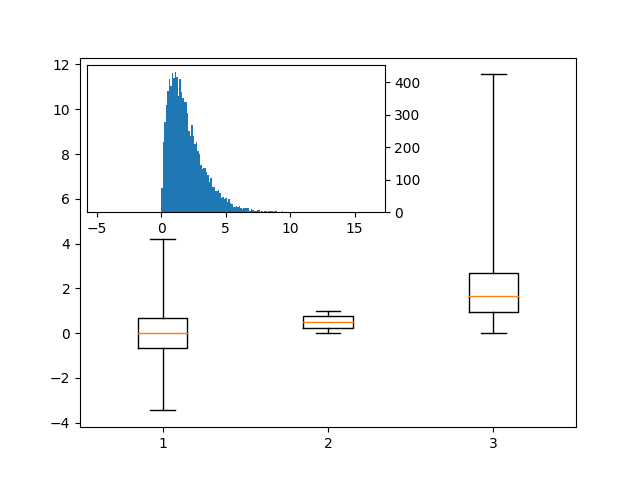

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Setting whis to 'range' is deprecated since 3.2 and support for it will be removed two minor releases later; set it to [0, 100] to achieve the same effect.
  after removing the cwd from sys.path.


In [49]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [50]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


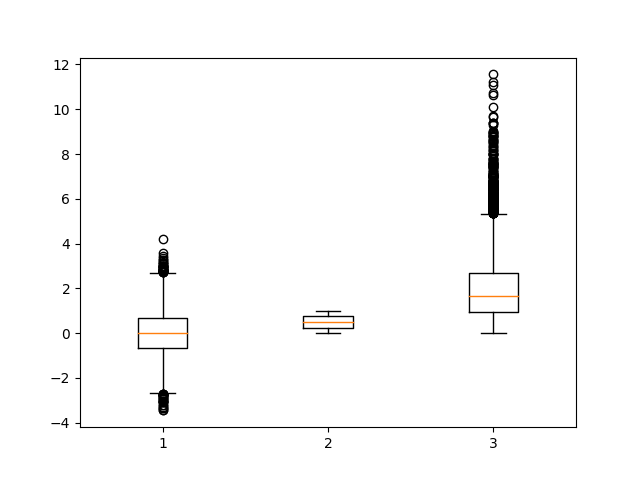

In [51]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

Heatmaps are a way to visualize three-dimensional data and to take advantage of spatial proximity of those dimensions.

Heatmaps are really quite powerful when **plotted with the right data**. Weather data is a great example. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity.
 
Heatmaps aren't all bad. But where they break down is when there's **no continuous relationship between dimensions**. Using a heatmap for categorical data, for instance, is just plain wrong. It misleads the viewer into looking for patterns and ordering through spatial proximity. And any such patterns would be purely spurious.

<IPython.core.display.Javascript object>


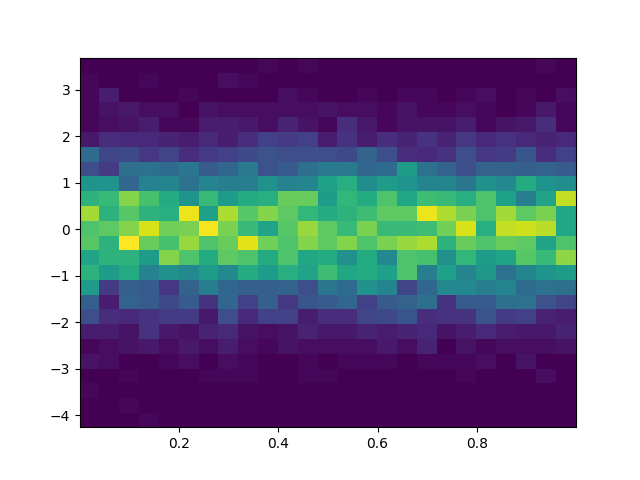

In [52]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)

<IPython.core.display.Javascript object>


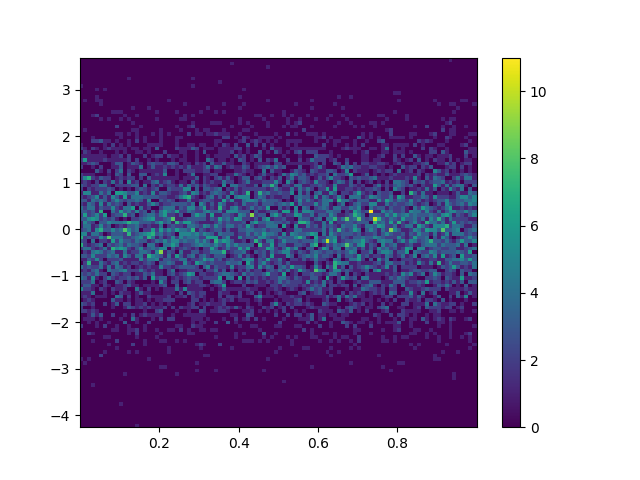

In [53]:
plt.figure()
# Increasing the number of bins, every data point starts falling into its own category, resulting in a clearer picture.
# However, as bin count increases, eventually the "heat" disappears and everything comes ~same color.
_ = plt.hist2d(X, Y, bins=100)

In [54]:
# add a colorbar legend
plt.colorbar()

# Animations

In [55]:
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)

In [56]:
# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
        
    # clear current axis
    plt.cla()
    # create a histogranm using a set of value in x, up to index curr
    bins = np.arange(-4, 4, 0.5)
    plt.hist(x[:curr], bins=bins)
    # set axis values, otherwise the histogram will continually autoscale between frames
    # leading to suboptimal animated effects
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])

<IPython.core.display.Javascript object>


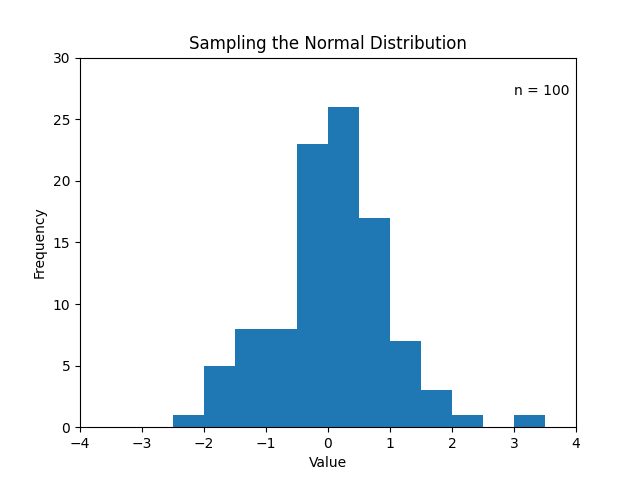

In [57]:
fig = plt.figure()
# FuncAnimation builds animation by iteratively invokikng the function passed in
# The argument function either clears the axis object and redraw the next frame with user-visible content,
# or return a list of objects which will need to be redrawn
a = animation.FuncAnimation(fig, update, interval=100)

# Interactivity

<IPython.core.display.Javascript object>


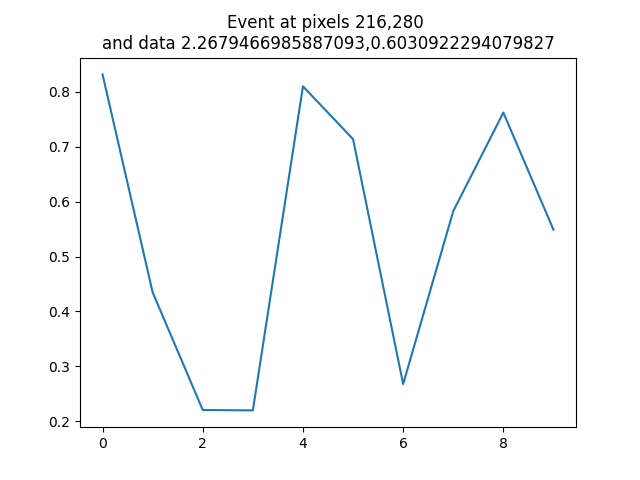

7

In [58]:
plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
    
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [59]:
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.197224,0.470725,Mexico
1,0.043729,0.954601,Canada
2,0.304126,0.921489,USA
3,0.383613,0.336925,Chile
4,0.909096,0.806649,UK
5,0.855884,0.253974,China
6,0.242268,0.940158,Iraq
7,0.630184,0.086990,Germany
8,0.105246,0.196998,Brazil
9,0.651737,0.760850,India


<IPython.core.display.Javascript object>


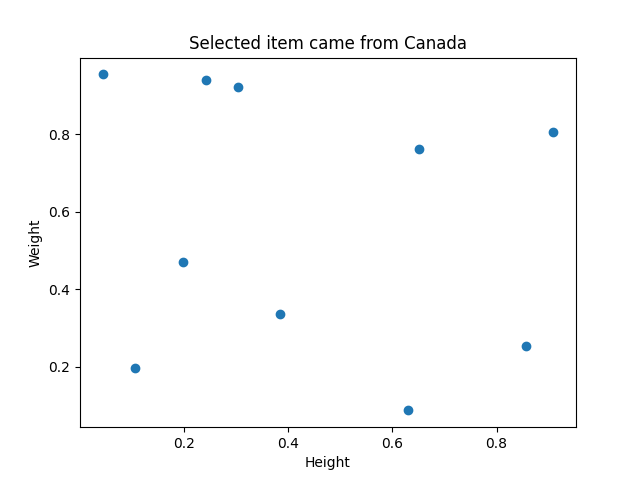

Text(0.5, 0, 'Height')

In [60]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [61]:
def onpick(event):
    # matplotlib is not aware of the data frame, but since it renders data in the same order, dataframe iloc indexer
    # can be used to retrieve origin information
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7